<a href="https://colab.research.google.com/github/myDSMLProjects/Deep-Learning/blob/master/backprop%2C_momentum%2C_adam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import io
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def chart_regression(pred, y, sort=True):
  t = pd.DataFrame({'pred':pred, 'y':y.flatten()})
  if sort:
    t.sort_values(by=['y'], inplace=True)
  plt.plot(t['y'].tolist(), label='Expected')
  plt.plot(t.pred.tolist(), label='Predicted')
  plt.ylabel('Output')
  plt.legend()
  plt.show()

In [0]:
df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/jh-simple-dataset.csv",
    na_values=['NA','?'])

In [0]:
# Generate dummies for job
df = pd.concat([df,pd.get_dummies(df['job'],prefix="job")],axis=1)
df.drop('job', axis=1, inplace=True)

# Generate dummies for area
df = pd.concat([df,pd.get_dummies(df['area'],prefix="area")],axis=1)
df.drop('area', axis=1, inplace=True)

# Generate dummies for product
df = pd.concat([df,pd.get_dummies(df['product'],prefix="product")],axis=1)
df.drop('product', axis=1, inplace=True)

# Missing values for income
med = df['income'].median()
df['income'] = df['income'].fillna(med)

# Standardize ranges
df['income'] = zscore(df['income'])
df['aspect'] = zscore(df['aspect'])
df['save_rate'] = zscore(df['save_rate'])
df['subscriptions'] = zscore(df['subscriptions'])

# Convert to numpy - Classification
x_columns = df.columns.drop('age').drop('id')
x = df[x_columns].values
y = df['age'].values

# Create train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=42)

In [11]:
# Build the network
model = Sequential()
model.add(Dense(25, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto', restore_best_weights=True)
model.fit(x,y, validation_data=(x_test, y_test), callbacks=[monitor], verbose=0, epochs=1000)

Restoring model weights from the end of the best epoch.
Epoch 00107: early stopping


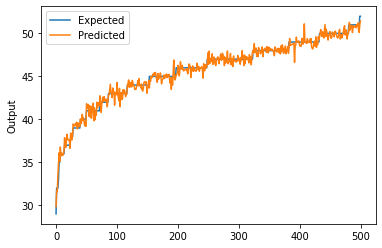

In [14]:
pred = model.predict(x_test)
chart_regression(pred.flatten(), y_test)